# Laborator 9 - Interpolari
 _Lumea este continua, dar mintea e discreta_ - **David Mumford**, laureat al Medaliei Fields (1974)
 
## De ce?

Lumea observabila este mereu continua, pe cand datele masurate nu pot fi altfel decat discrete, deoarece acestea nu pot fi masurate decat punctual, in anumite momente de timp. De aici apare o problema:
> Cum corelam ceea ce masuram cu ce se intampla in realitate?

Mai exact, daca avem nevoie de valori ale fenomenului studiat la momente de timp in care nu s-au facut masuratori, ce facem? Simplu: interpolam rezultatele masuratorilor si **aproximam** rezultatele dorite. Trebuie observat si ca majoritatea functiilor matematice care modeleaza fenomene intalnite in natura sunt **continue.**

Exemple de situatii in care se folosesc interpolari:

- senzorii de temperatura de pe plava video / procesor, ofera date discrete, care se interpoleaza si se obtin grafice
- egalizatoarele de sunet: se seteaza anumite frecvente, valorile intermediare fiind deduse numeric
- statistica: calcule la bursele de valori, predictii de profit si dezvoltare financiara
- captare de semnale WiFi, radar, radio etc.
- AutoCAD
- jocuri, streaming

## Cum se face?

Functia de interpolat este data printr-un set de puncte de pe graficul acesteia, numite **suportul interpolarii**:

$$\{(x_0,\ f(x_0)),\ (x_1,\ f(x_1)), \dots, (x_n,\ f(x_n))\}$$.

Prin interpolare, se determina una sau mai multe **functii (adesea polinomiale)** ce aproximeaza valorile functiei, cu o eroare acceptabila.

De ce polinoame?

- sunt usor de retinut in memoria calculatorului (de ex.: un vector in care se retin coeficientii $a_0, a_1, \dots, a_n$ corespunzatori termenilor $x^0, x^1, \dots, x^n$ ai polinomului);

- sunt usor de derivat si integrat numeric, de catre un calculator;

- sunt flexibile, iar modificand coeficientii sau gradul se pot modela in multiple moduri.

### De ce putem face asta?

Datorita **Teoremei lui Weierstrass**:  
$ \forall \ f : [a, b] \rightarrow \mathbb{R}$ continua si $a, b \in \mathbb{R}$, atunci $\forall \varepsilon > 0$, exista un polinom $P(x)$ de grad suficient de mare astfel incat
urmatoarea relatie sa fie valabila $\forall x \in [a, b]$:
$$|f(x) - P(x)| < \varepsilon$$

Cu alte cuvinte, **orice functie continua pe un interval poate fi aproximata cu un polinom, cu o eroare oricat de mica**.

![ref](Teorema_lui_Weierstrass.png 'Aproximarea lui f conform Teoremei lui Weierstrass')


Un rezultat cunoscut ce ilustreaza aceasta teorema este **descompunerea in serie Taylor** (exemplificata in [Anexa 1](#taylor)):

Totusi, interpolarea folosind serii Taylor nu se foloseste. De ce?

- aceasta interpolare concentreaza informatia in jurul punctului $t$, iar pe masura ce ne departam de el, erorile devin mari;
- din acest motiv, pentru orice nou punct $x$ ar fi nevoie de recalcularea polinomului Taylor intr-o vecinatatea a acestui $x$, ceea ce ar necesita o complexitate de calcul prea mare;
- insasi calcularea polinomului este problematica: presupune calcularea de derivate de ordin mare, acestea fiind operatii costisitoare din punctul de vedere al timpului de executie, daca se doresc precizii mari.

## Concluzii generale
Asadar, de la interpolari ne dorim, in general:
- ca prin calcularea functiilor necesare o singura data, acestea sa ofere aproximari cu erori mici (de un ordin acceptabil) pentru orice puncte din domeniul de interpolare;
- ca functiile obtinute sa fie polinomiale
- complexitati cat mai mici pentru o anumita precizie - duh!

# Interpolare cu functii Spline

## De ce?

Pana acum am analizat 2 metode de interpolare ce aveau ca rezultat un singur polinom ce trecea prin toate punctele date. Ce probleme apareau?
- erori mari in capetele domeniului de interpolare la Lagrange, din cauza gradului mare al polinomului
- complexitate de calcul exponentiala la Neville, daca nu se foloseste memoizarea: $O(2^n)$

In aparenta, ar fi necesar un compromis perpetuu intre complexitate si erori. Cu toate acestea, exista moduri in care putem obtine o interpolare buna, fara a face compromisuri: **functiile Spline.** Pentru a scapa de problema polinoamelor de grad mare, ce pot avea oscilatii greu de controlat, se vor interpola cate **2 puncte consecutive**, functiile rezultate fiind alese astfel incat sa rezulte o curba cat mai **neteda**.

**Se cauta, deci, o functie $S$ definita pe ramuri. Fiecare dintre aceste ramuri reprezinta o alta functie, numita functie de imbinare:** $\textbf{$s_0, s_1, \dots, s_{n -1}$}$ care sa asigure interpolari intre cate 2 puncte consecutive ale functiei date. Putem defini $S(x)$ astfel:

$$
S(x) = \begin{cases} s_0(x), & x \in [x_0, x_1] \\ s_1(x), & x \in [x_1, x_2] \\ . \\ . \\ . \\ s_{n - 1}(x), & x \in [x_{n - 1}, x_n] \end{cases}
$$

## 1. Interpolare cu functii de clasa $C^0$

Intr-o prima instanta ne punem problema gasirii unei functii $S$ **continue** care sa interpoleze toata functia data si sa treaca prin punctele-suport. Functiile de imbinare $s_0, s_1, \dots, s_n$ vor fi niste drepte, deci vor fi polinoame de grad 1:

$$s_i(x) = a_ix + b_i; \  a_i, b_i \in \mathbb{R}, i = \overline{0,n - 1}$$

Dupa cum se observa, sunt $2n$ necunoscute, $a_i$ si $b_i$ cu $i = \overline{0,n - 1}$. Deci, vom avea nevoie de $2n$ ecuatii pentru a le determina. Aceste ecuatii rezulta din 2 tipuri de conditii fundamentale pentru interpolarile cu functii Spline:

### Conditii de interpolare

Aceste conditii se asigura ca $S$ trece prin toate punctele-suport:

$s_i(x_i) = f(x_i), \  i = \overline{0,n - 1} \Rightarrow$ **n ecuatii**

$s_{n - 1}(x_n) = f(x_n)$

### Conditii de racordare

Functia $S \in C^0([x_0, x_n])$, deci este continua, iar conditiile de racordare vizeaza aceasta proprietate:

$s_i(x_{i + 1}) = s_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 1}  \Rightarrow$ **alte n ecuatii**

In total, din aceste 2 conditii rezulta cele $2n$ ecuatii necesare. Sistemul va fi de forma:

$a_ix_i + b_i = f(x_i), \ i = \overline{0,n - 1}$

$a_{n - 1}x_n + b_n = f(x_n)$

$(a_i - a_{i + 1})x_{i + 1} + (b_i - b_{i + 1}) = 0, \ i = \overline{0,n - 1}$, trecand membrul drept din conditiile de racordare in partea stanga

Dupa rezolvarea acestui sistem, va rezulta o interpolare de forma:

![ref1](Spline_C0.png 'Graficul interpolarii cu functii Spline continue, in diverse puncte')

Observati natura erorilor in fiecare caz! Asadar, pentru o eroare de ordinul $10^{-3}$ este nevoie in acest caz de de 3 ori mai multe puncte-suport. Pe langa posibilitatea de a a nu dispune de acele puncte suplimentare, calcularea Spline-urilor in acestea ar face ca numarul de operatii sa creasca de $9$ ori (folosind metode iterative, complexitatea de rezolvare a unui sistem este $O(n^2)$).

Deci Spline-urile de clasa $C^0$ nu sunt prea eficiente daca numarul de puncte din suportul interpolarii este mic. Daca ne uitam la functia data in graficele de mai sus, aceasta nu pare doar continua, ci pare ca are si **derivata continua**. Ce ar fi sa imitam acest comportament?

##  2. Interpolare cu functii de clasa $C^1$

### Ce se schimba?

Care sunt diferentele dintre o functie de clasa $C^0$ si una de clasa $C^1$? Se pot observa in graficele de mai jos. In cel de sus avem [Fractalul lui Weierstrass](https://en.wikipedia.org/wiki/Weierstrass_function), o functie continua, pe $\mathbb{R}$, dar nederivabila in niciun punct, iar jos este rezultatul **integrarii** functiei care genereaza acest fractal, adica o functie de clasa $C^1$, dar care nu are derivata de ordin 2 in niciun punct. Observati ca aceasta din urma este mai **neteda**:

![ref2](C0vsC1.png 'Functia lui Weierstrass comparata cu una dintre primitivele sale')

Nu putem obtine un $S$ de clasa $C^1$ cu polinoame de imbinare de grad 1, ci este nevoie ca functiile de imbinare sa fie **polinoame de grad 3 (functii cubice)**, intrucat cele de grad 2 ce ar rezulta in urma integrarii functiilor de imbinare de mai sus nu sunt destul de flexibile in practica. Pentru usurinta in calcule, vom considera:

$$s_i(x) = a_i(x - x_i)^3 + b_i(x - x_i)^2 + c_i(x - x_i) + d_i; \  a_i, b_i, c_i, d_i \in \mathbb{R}, i = \overline{0,n - 1}$$

Acum avem $4n$ necuoscute, deci vom avea nevoie de tot atatea ecuatii. Daca am folosi doar conditiile de interpolare si de racordare de la Spline-urile de clasa $C^0$, la care am adauga conditia ca $S'$ sa fie continua, am avea doar $3n - 1$ ecuatii. Din acest motiv, se impune sa cunoastem si **derivata functiei date** in punctele-suport:

### Conditii de interpolare

$s_i(x_i) = f(x_i), \ i = \overline{0,n - 1} \Rightarrow n$ ecuatii

$s'_i(x_i) = f'(x_i), \ i = \overline{0,n - 1} \Rightarrow n$ ecuatii (aceasta conditie devine necesara din cauza numarului redus de ecuatii)

$s_{n - 1}(x_n) = f(x_n)$

$s'_{n - 1}(x_n) = f'(x_n)$

### Conditii de racordare

$s_i(x_{i + 1}) = s_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 2}  \Rightarrow n - 1$ ecuatii

$s'_i(x_{i + 1}) = s'_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 2}  \Rightarrow n - 1$ ecuatii

Acum am obtinut cele $4n$ ecuatii necesare.

## 3. Interpolare cu functii de clasa $C^2$

Dupa cum s-a vazut, marind clasa unei functii, aceasta devine mai neteda, iar in general, ceea ce se gaseste in natura, deci si datele care vor trebui la un moment dat interpolate sunt modelate dupa functii netede. Din acest motiv, se impune trecerea la interpolare cu functii Spline de clasa $C^2$, astfel incat si **curbura functiilor de imbinare** sa fie avuta in vedere. Amanunte despre utilitatea derivatei a doua se pot vedea in [Anexa 2](#deriv).

De asemenea, utilizarea unor functii Spline de clasa $C^2$ ofera un alt avantaj: acum avem suficiente ecuatii pentru a **nu mai avea nevoie de toate valorile derivatei functiei date**:

### Conditii de interpolare

$s_i(x_i) = f(x_i), \ i = \overline{0,n - 1} \Rightarrow n$ ecuatii

$s_{n - 1}(x_n) = f(x_n)$

### Conditii de racordare

$s_i(x_{i + 1}) = s_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 2}  \Rightarrow n - 1$ ecuatii

$s'_i(x_{i + 1}) = s'_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 2}  \Rightarrow n - 1$ ecuatii

$s''_i(x_{i + 1}) = s''_{i + 1}(x_{i + 1}), \  i = \overline{0,n - 2}  \Rightarrow n - 1$ ecuatii

In total $\textbf{4n - 2}$ **ecuatii**, dar ne trebuie $\textbf{4n}$ **ecuatii**. Din acest motiv, se introduc 2 tipuri de Spline-uri de clasa $C^2$:

### Spline-uri naturale

Poarta denumirea aceasta deoarece la capetele setului de puncte date, graficul lui $S$ va fi drept, acest lucru datorandu-se alegerii:

$$s''(x_0) = 0 \textrm{ si } s''_{n - 1}(x_n) = 0$$

### Spline-uri tensionate

Daca este posibil, se prefera sa se lucreze la capetele domeniului de interpolare cu derivatele functiei date, pentru a se utiliza mai multa informatie despre aceasta, aceasta varianta fiind in general mai precisa decat Spline-urile naturale:

$$s'(x_0) = f'(x_0) \textrm{ si } s'_{n - 1}(x_n) = f'(x_n)$$

# Curbe Bézier


O curba Bézier este o curba parametrica ce are la baza polinoamele Bernstein.
Dandu-se un set de $n+1$ puncte de control $P_0, P_1, ..., P_n$, o curba  Bézier este definita prin urmatoarea relatie:
$$B(n) = (1 - t)^n \cdot P_0 + C_n^1 \cdot (1 - t)^{n - 1} \cdot t \cdot P_1 + ... + C_n^{n - 1} \cdot (1 - t) \cdot t^{n - 1} \cdot P_{n - 1} + t^n \cdot P_n, \; t \in [0, 1],$$
$$B(n) = \sum_{i = 0}^{n} P_i \cdot  B_{i, n}(t), \; t \in [0, 1],$$
unde $B_{i, n}(t)$ este un polinom Bernstein de grad $n$.

## Polinoame Bernstein

Un polinom Bernstein de grad $n$ este definit astfel:
$$B_{i, n}(t) = C_n^i \cdot  (1-t)^{(n-i)} \cdot  t^i$$
pentru $i = \overline{0, n}$, unde  $$C_n^i = \frac{n!}{i!\cdot  (n-i)!}$$

Polinoamele Bernstein se obtin pornind de la identitatea $(1 - t) + t = 1$, ridicand la puterea $n$ si dezvoltand folosind binomul lui Newton.

### Proprietatile polinoamelor Bernstein
- sunt nenegative pe intervalul $[0, 1]$: $B_{i, n}(t) \geq 0$
- polinoamele Bernstein de grad $n$ formeaza o partitie a unitatii: $\sum_{i=0}^{n} B_{i, n}(t) = (1 - t + t)^n = 1$
- simetrie: $B_{i, n}(t) = B_{n - i, n}(1 - t)$
- respecta formula de recurenta: $B_{i, n}(t) = (1 - t)\cdot B_{i,  n - 1}(t) + t\cdot  B_{i - 1, n - 1}(t)$
- functia $B_{i, n}(t)$ are pe intervalul $[0, 1]$ un punct de maxim $t = \displaystyle\frac{i}{n}$


### Vizualizare polinoame Bernstein

In [1]:
function [] = BernsteinDeg0()
    t = linspace(0, 1, 100);

    B00 = (ones(1, 100));
    plot(t, B00, "r");

    title ("Polinom Bernstein de grad 0", "fontsize", 20);
    xlabel("t");
    ylabel("B00");
    h = legend ("B00");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

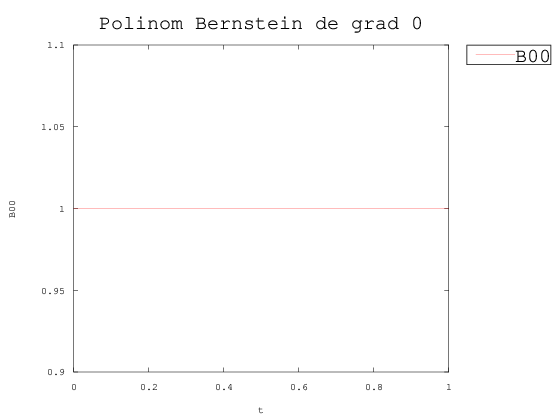

In [2]:
BernsteinDeg0()

In [3]:
function [] = BernsteinDeg1()
    t = linspace(0, 1, 100);

    B01 = 1 - t;
    plot(t, B01, "r");
    hold on;

    B11 = t;
    plot(t, B11, "g");

    title ("Polinom Bernstein de grad 1", "fontsize", 20);
    xlabel("t");
    ylabel("B00, B11");
    h = legend ("B01", "B11");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

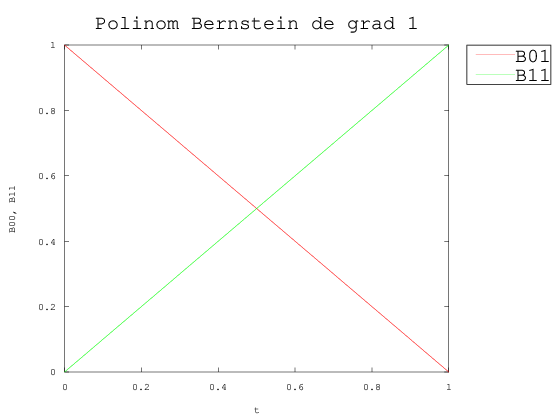

In [4]:
BernsteinDeg1()

In [5]:
function [] = BernsteinDeg2()
    t = linspace(0, 1, 100);

    B02 = (1 - t) .^ 2;
    plot(t, B02, "r");
    hold on;

    B12 = 2 * t .* (1 - t);
    plot(t, B12, "g");
    hold on;

    B22 = t .^ 2;
    plot(t, B22, "y");

    title ("Polinom Bernstein de grad 2", "fontsize", 20);
    xlabel("t");
    ylabel("B02, B12, B22");
    h = legend ("B02", "B12", "B22");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

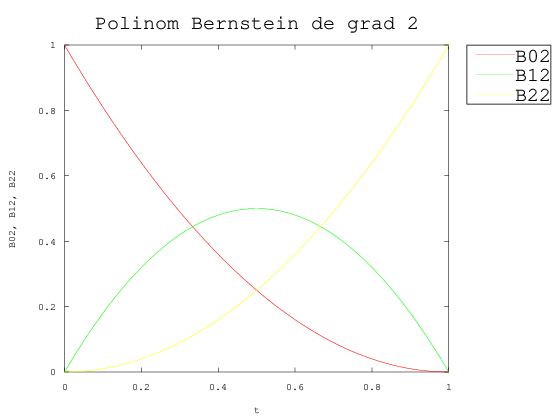

In [6]:
BernsteinDeg2()

In [7]:
function [] = BernsteinDeg3()
    t = linspace(0, 1, 100);

    B03 = (1 - t) .^ 3;
    plot(t, B03, "r");
    hold on;

    B13 = 3 * t .* (1 - t) .^ 2;
    plot(t, B13, "g");
    hold on;

    B23 = 3 * t .^ 2 .* (1 - t);
    plot(t, B23, "y");
    hold on;

    B33 = t .^ 3;
    plot(t, B33, "b");

    title ("Polinom Bernstein de grad 3", "fontsize", 20);
    xlabel("t");
    ylabel("B03, B13, B23, B33");
    h = legend ("B03", "B13", "B23", "B33");
    legend (h, "location", "northeastoutside");
    set (h, "fontsize", 20);
endfunction

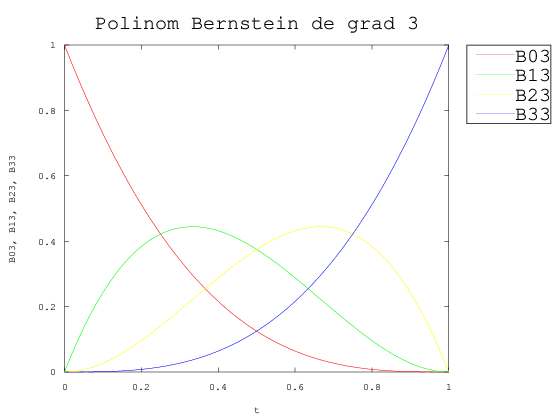

In [8]:
BernsteinDeg3()

## Proprietatile unei curbe Bézier
- nu trece prin toate punctele de control, ci doar prin $P_0$ si $P_n$ ($B(0) = P_0$ si $B(1) = P_n$);
- este tangenta segmentelor $P_0P_1$ si $P_{n-1}P_{n}$;
- este continuta complet in infasuratoarea convexa a punctelor de control;
- este liniara doar daca punctele de control sunt coliniare;
- poate fi descompusa in alte 2 curbe Bézier.

## La ce se folosesc curbele Bézier?
- grafica pe calculator (Adobe Illustrator, Inkscape);
- generare de fonturi (FreeType);
- robotica;
- animatie (Adobe Flash, CSS, JavaScript).

## Tipuri de curbe Bézier

#### Curbe Bézier liniare:
$$B(t) = (1-t)\cdot P_0 + t\cdot P_1$$

![ref](Bézier_1.gif)

In [9]:
function [] = linearBezier()
    pt1 = [5; -10];
    pt2 = [45; 15];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t), pt1) + kron(t ,pt2);
    
    % plotare infasuratoare convexa
    CH = [pt1(1) pt1(2); pt2(1) pt2(2)];
    plot(CH(:, 1), CH(:, 2), "b");

    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier liniara", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

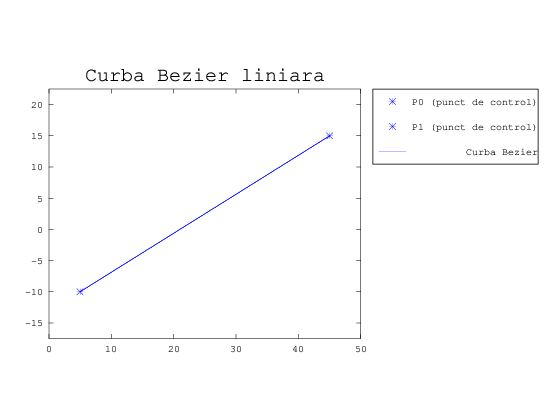

In [10]:
linearBezier()

#### Curbe Bézier cuadratice:
$$B(t) = (1-t)^2\cdot P_0 + 2t\cdot (1-t)\cdot P_1 + t^2\cdot P_2$$
![ref](Bézier_2.gif)

In [7]:
function [] = cuadraticBezier()
    pt1 = [ 5; -10];
    pt2 = [18; 18];
    pt3 = [45; 15];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;
    plot(pt3(1), pt3(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t) .^ 2, pt1) + kron(2 * (1 - t) .* t, pt2) + kron(t .^ 2, pt3);

    % plotare infasuratoare convexa
    CH = [pt1(1) pt1(2); pt2(1) pt2(2); pt3(1) pt3(2)];
    plot(CH(:, 1), CH(:, 2), "g");
    
    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier cuatratica", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "P2 (punct de control)", "Infasuratoare convexa", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

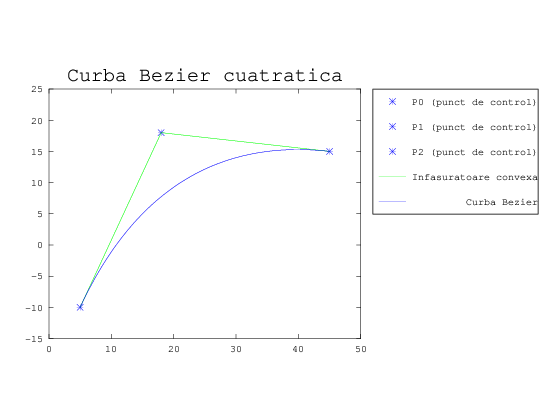

In [8]:
cuadraticBezier()

#### Curbe Bézier cubice:
$$B(t) = (1-t)^3\cdot P_0 + 3t\cdot(1-t)^2\cdot P_1 + t^2\cdot (1-t)\cdot P_2 + t^3\cdot P_3$$
![ref](Bézier_3.gif)

In [5]:
function [] = cubicBezier()
    pt1 = [ 5; -10];
    pt2 = [18; 18];
    pt3 = [45; 15];
    pt4 = [38; -5];

    % plotare puncte
    plot(pt1(1), pt1(2), '*');
    hold on;
    plot(pt2(1), pt2(2), '*');
    hold on;
    plot(pt3(1), pt3(2), '*');
    hold on;
    plot(pt4(1), pt4(2), '*');
    hold on;

    xlim([0 50]);
    axis equal;

    % ecuatia parametrica
    t = linspace(0, 1, 101);
    pts = kron((1 - t) .^ 3, pt1) + kron(3 * (1 - t) .^ 2 .* t, pt2) + kron(3 * (1 - t) .* t .^ 2, pt3) + kron(t .^ 3, pt4);

    % plotare infasuratoare convexa
    CH = [pt1(1) pt1(2); pt2(1) pt2(2); pt3(1) pt3(2) ; pt4(1) pt4(2)];
    plot(CH(:, 1), CH(:, 2), "g");
    
    % plotare curba
    plot(pts(1, :), pts(2, :));
    title ("Curba Bezier cubica", "fontsize", 20);
    h = legend ("P0 (punct de control)", "P1 (punct de control)", "P2 (punct de control)", "P3 (punct de control)", "Infasuratoare convexa", "Curba Bezier");
    legend (h, "location", "northeastoutside");
endfunction

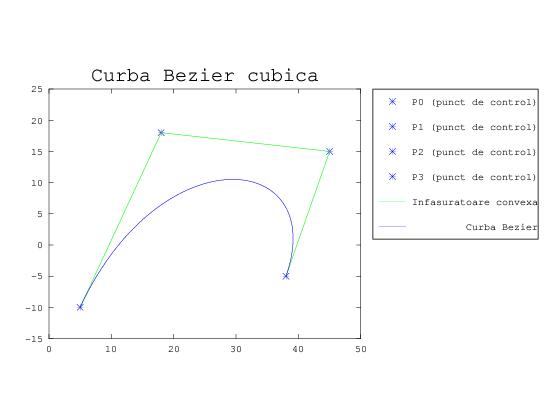

In [6]:
cubicBezier()

Pentru a vedea mai multe animatii ale curbelor Bézier, puteti accesa urmatorul link:
https://www.jasondavies.com/animated-bezier/.

## Comportament numeric

Totusi, folosirea ecuatiei parametrice este instabila numeric, intrucat se pot ridica la puteri mari numere mici (atunci cand $t \approx 0$ sau $t \approx 1$). Un mod eficient de a rezolva aceasta problema este folosirea algoritmului De Casteljau, care poate fi privit ca o interpolare liniara repetata.

# Algoritmul De Casteljau

Pentru a construi o curba Bézier se foloseste proprietatea ca orice curba de acest tip poate fi impartita in alte doua curbe Bézier. Pentru acest lucru este nevoie sa gasim doua seturi de puncte de control pentru cele doua noi curbe.

Se foloseste urmatoarea relatie de recurenta, unde $i$ reprezinta indicele punctului de control si $j$ pasul:
$$P_i^0 = P_i, \; i = \overline{0,n}$$
$$P_i^j =P_i^{j-1}\cdot (1-t) + P_{i+1}^{j-1}\cdot t \text{, cu } i = \overline{0,n-j}, j = \overline{1,n}$$
$$B(t) = P_0^n$$

Fie $P_i^0$ si $P_{i+1}^0$ doua puncte de control succesive si $P_i^{1}$ un punct care imparte segmentul $P_i^0 P_{i+1}^0$ in raportul $\displaystyle\frac{t}{1-t}$ (raportul intre distanta dintre $P_i^{0}$ si $P_i^{1}$ si cea dintre $P_i^{0}$ si $P_{i+1}^{0}$ este $t$). Rezulta urmatoarea relatie:
$$P_i^{1} = P_i^{0} + t\cdot (P_{i+1}^{0} - P_i^0) = (1-t)\cdot P_i^0 + t\cdot P_{i+1}^0$$

Pornind de la poligonul $P_{0}^{0}$, $P_{1}^{0}$, ..., $P_{n}^{0}$ si aplicand relatia de mai sus, rezulta poligonul $P_{0}^{1}$, $P_{1}^{1}$, ..., $P_{n-1}^{1}$, apoi $P_{0}^{2}$, $P_{1}^{2}$, ..., $P_{n-2}^{2}$, pentru ca in final sa se obtina punctul $P_{0}^{n}$, fiind un punct de pe curba Bézier.

Algoritmul poate fi implementat recursiv, functia deCasteljau(i, j) returnand punctul $P_i^j$. Pseudocodul este urmatorul:

&emsp;_function **deCasteljau$(i, j)$**    
&emsp;&emsp;&emsp;if $j = 0$ then   
&emsp;&emsp;&emsp;&emsp;return $P_i^0$    
&emsp;&emsp;&emsp;else   
&emsp;&emsp;&emsp;&emsp;return $(1-t)\cdot P_i^{j - 1} + t\cdot P_{i + 1}^{j - 1}$    
&emsp;endfunction_
    
Desi pare o implementare eleganta, se poate observa ca unele apeluri ale functiei se repeta de multe ori, algoritmul avand o complexitate exponentiala. Pentru ca algoritmul sa aiba o complexitate mai buna, se poate folosi memoizarea (se retin intr-un vector punctele auxiliare deja calculate).

Pentru $n = 3$, algoritmul De Casteljau este ilustrat in urmatorea schema ($P_{i, j} = P_i^j$):

![ref](deCasteljau.PNG)

## Probleme propuse
1. Completati urmatoarea bucata de cod pentru a calcula un punct de pe o curba Bézier, folosind algoritmul prezentat anterior:

In [ ]:
	% coordonatele punctelor de control
    x_original = [1 0.7 2.7 3.7];
	y_original = [0.5 2 2 0.5];

	k = 1;
	n = length(x_original);
	B_x = zeros();
	B_y = zeros();
	hold off; 
		
	for t = 0 : 0.2 : 1
        % plotare puncte de control
		plot(x_original, y_original, 'k-o');
		legend ('puncte de control');
		hold on;

		axis([0.5, 4.5, 0.2, 2.1]);

		x = x_original;
		y = y_original;

        % De Casteljau
		for j = 1 : n - 1
			for i = 1 : n - j 
                % TODO: P(i, j) = (1-t) * P(i, j - 1) + t * P(i + 1, j - 1)
                x(i, j) = (1 - t) * x(i, j - 1) + t * x(i + 1, j - 1)
                y(i, j) = (1 - t) * y(i, j - 1) + t * y(i + 1, j - 1)
			endfor
		
			%plot(x(1 : n - j), y(1 : n - j), 'r-*');
			hold on;
		
		endfor

        % plotare puncte de pe curba Bezier
		B_x(k) = x(1);
		B_y(k) = y(1);
		plot(B_x, B_y, 'b-s');
		legend ('puncte calculate', 'puncte aflate pe curba Bezier');
		k++;
		
		%pause(0.5);
		hold off;
	endfor	
	

<a id='taylor'></a>

## Anexa 1 - aproximarea folosind descompunerea in serie Taylor 

Fie $f:[a,b] \rightarrow \mathbb{R}$, continua si $f \in C^{n + 1}((a, b))$, atunci pentru orice $x \in [a, b]$ si $\forall t \in [a, b]$, $\exists \ \xi \in (t, x)$ astfel incat:

$$f(x) = f(t) + \frac{(x - t)}{1!}f'(t) + \frac{(x - t)^2}{2!}f''(t) + \dots + \frac{(x-t)^n}{n!}f^{(n)}(t) + \frac{(x - t)^{n + 1}}{(n + 1)!}f^{(n + 1)}(\xi)$$

Notand $P_n(x) = \displaystyle\sum_\limits{i = 0}^{n}\frac{(x - t)^i}{i!}f^{(i)}(x - t)$ si $R_n(x) = \displaystyle\frac{(x - t)^{n + 1}}{(n + 1)!}f^{(n + 1)}(\xi)$, polinomul de interpolare, respectiv eroarea interpolarii, s-ar poate spune ca descompunerea in serie Taylor reprezinta o metoda buna de interpolare:

![ref2](Taylor.png 'Aproximarea lui e^x cu descompunere in serie Taylor in jurul lui t = 0')

<a id='deriv'></a>

## Anexa 2 - importanta derivatei a doua

Spuneam mai sus ca derivata a doua reprezinta o masura a **curburii** unei functii, mai exact cat de stransa este o curba facuta de aceasta (puteti face analogia cu o curba pe o sosea).

Fie o functie $f$ si un punct $P(x, f(x)) \in G_f$. Atunci $\exists!$ un cerc de raza $r$ care aproximeaza f intr-o vecinantate a punctului $P$. Mai jos se poate observa acest fenomen pentru o curba $C$:

![ref1](Curbura.png 'Aproximarea lui C intr-o vecinatate a lui P')

Astfel, putem defini curbura cu semn intr-un punct $x$, $k_x$, ca fiind opusul razei cercului de mai sus. Se poate demonstra urmatoare identitate:

$$k_x = \frac{1}{r} = \displaystyle\frac{f''(x)}{(1 + f'^2(x))^\frac{3}{2}}$$

Animatia de mai jos poate exemplifca modificarea curburii in functie de raza cercului:

![ref1](Deriv2.gif 'Curbura functiei f(x) = x^3')

In mod informal, am putea spune ca a doua derivata a unei functii ilustreaza "amplitudinea" curbei acesteia (cat de larga este aceasta curba), iar conditia de continuitate a celei de-a doua derivate ne asigura ca toate schimbarile de curbura ale functiei noastre Spline vor fi line, aceasta devenind astfel mai **neteda**.